# Dataset Statistics for Perception Package Projects
This example notebook shows how to use datasetinsights to load synthetic datasets generated from the [Perception package](https://github.com/Unity-Technologies/com.unity.perception) and visualize dataset statistics. It includes statistics and visualizations of the outputs built into the Perception package and should give a good idea of how to use datasetinsights to visualize custom annotations and metrics.

## Setup dataset
If the dataset was generated locally, point `data_root` below to the path of the dataset. The `GUID` folder suffix should be changed accordingly.   

In [1]:
data_root = "C:/Users/leopoldo.zugasti/Desktop/282ada4a-ab8d-4817-9775-6203fdaaff46"

### Unity Simulation [Optional]
If the dataset was generated on Unity Simulation, the following cells can be used to download the metrics needed for dataset statistics.

Provide the `run-execution-id` which generated the dataset and a valid `access_token` in the following cell. The `access_token` can be generated using the Unity Simulation [CLI](https://github.com/Unity-Technologies/Unity-Simulation-Docs/blob/master/doc/cli.md#usim-inspect-auth).

In [2]:
from datasetinsights.io.downloader import UnitySimulationDownloader

#run execution id:
# run_execution_id = "xxx"
# #access_token:
# access_token = "xxx"
# #annotation definition id:
# annotation_definition_id = "6716c783-1c0e-44ae-b1b5-7f068454b66e"
# #unity project id
# project_id = "xxx"
# source_uri = f"usim://{project_id}/{run_execution_id}"

# downloader = UnitySimulationDownloader(access_token=access_token)


Before loading the dataset metadata for statistics we first download the relevant files from Unity Simulation.


In [3]:
# downloader.download(source_uri=source_uri, output=data_root)

## Load dataset metadata
Once the dataset metadata is downloaded, it can be loaded for statistics using `datasetinsights.data.simulation`. Annotation and metric definitions are loaded into pandas dataframes using `AnnotationDefinitions` and `MetricDefinitions` respectively.

In [4]:
from datasetinsights.datasets.unity_perception import AnnotationDefinitions, MetricDefinitions
ann_def = AnnotationDefinitions(data_root)
ann_def.table

,id,name,description,format,spec
0,f9f22e05-443f-4602-a422-ebe4ea9b55cb,bounding box,Bounding box for each labeled object visible t...,json,"[{'label_id': 0, 'label_name': 'Dog'}, {'label..."
1,1ccebeb4-5886-41ff-8fe0-f911fa8cbcdf,instance segmentation,pixel-wise instance segmentation label,PNG,"[{'label_id': 0, 'label_name': 'Dog'}, {'label..."
2,12f94d8d-5425-4deb-9b21-5e53ad957d66,semantic segmentation,pixel-wise semantic segmentation label,PNG,"[{'label_name': 'Appliance_refrigerator', 'pix..."
3,0bfbe00d-00fa-4555-88d1-471b58449f5c,bounding box 3D,Bounding box for each labeled object visible t...,json,"[{'label_id': 0, 'label_name': 'Dog'}, {'label..."


In [5]:
metric_def = MetricDefinitions(data_root)
metric_def.table

,id,name,description,spec
0,db1b258e-d1d0-41b6-8751-16f601a2e230,scenario_iteration,Iteration information for dataset sequences,NaN
1,51da3c27-369d-4929-aea6-d01614635ce2,object count,Counts of objects for each label in the sensor...,"[{'label_id': 0, 'label_name': 'Dog'}, {'label..."


## Built-in Statistics
The following tables and charts are supplied by `datasetinsights.data.datasets.statistics.RenderedObjectInfo` on datasets that include the "rendered object info" metric.

In [6]:
from datasetinsights.stats.statistics import RenderedObjectInfo
import datasetinsights.datasets.unity_perception.metrics as metrics
from datasetinsights.datasets.unity_perception.exceptions import DefinitionIDError
from datasetinsights.stats import bar_plot, histogram_plot, rotation_plot

max_samples = 10000          # maximum number of samples points used in histogram plots

rendered_object_info_definition_id = "5ba92024-b3b7-41a7-9d3f-c03a6a8ddd01"
roinfo = None
try:
    roinfo = RenderedObjectInfo(data_root=data_root, def_id=rendered_object_info_definition_id)
except DefinitionIDError:
    print("No RenderedObjectInfo in this dataset")

No RenderedObjectInfo in this dataset


### Descriptive Statistics

In [7]:
if roinfo is not None:
    print(roinfo.num_captures())
    roinfo.raw_table.head(3)

### Total Object Count

In [8]:
if roinfo is not None:
    total_count = roinfo.total_counts()
    display(total_count)
    
    display(bar_plot(
        total_count, 
        x="label_id", 
        y="count", 
        x_title="Label Name",
        y_title="Count",
        title="Total Object Count in Dataset",
        hover_name="label_name"
    ))

### Per Capture Object Count

In [9]:
if roinfo is not None:
    per_capture_count = roinfo.per_capture_counts()
    display(per_capture_count.head(10))

In [10]:
if roinfo is not None:
    display(histogram_plot(
        per_capture_count, 
        x="count",  
        x_title="Object Counts Per Capture",
        y_title="Frequency",
        title="Distribution of Object Counts Per Capture",
        max_samples=max_samples
    ))

### Object Visible Pixels

In [11]:
if roinfo is not None:
    display(histogram_plot(
        roinfo.raw_table, 
        x="visible_pixels",  
        x_title="Visible Pixels Per Object",
        y_title="Frequency",
        title="Distribution of Visible Pixels Per Object",
        max_samples=max_samples
    ))

## Annotation Visualization
In the following sections we show how to load annotations from the Captures object and visualize them. Similar code can be used to consume annotations for model training or visualize and train on custom annotations.

### Unity Simulation [Optional]
If the dataset was generated on Unity Simulation, the following cells can be used to download the images, captures and annotations in the dataset. Make sure you have enough disk space to store all files. For example, a dataset with 100K captures requires roughly 300GiB storage.

In [12]:
# downloader.download(source_uri=source_uri, output=data_root, include_binary=True)

### Load captures

In [13]:
from datasetinsights.datasets.unity_perception.captures import Captures
cap = Captures(data_root)
cap.captures.head(3)

,id,sequence_id,step,timestamp,sensor,ego,filename,format,annotations
0,b477dcd3-f803-4984-8552-7e622185262f,385ba900-242c-4fed-af33-91a3b0e86d02,0,0.0,{'sensor_id': '6a14ecd2-e1c5-4c6a-b231-04fa611...,{'ego_id': '179f9d24-b8ee-4407-89c5-437c42e0b6...,RGBd52b0fc1-c621-47af-8dc4-a81189e20347/rgb_4.png,PNG,[{'id': '08cedbd8-f5e7-4a3f-a06f-d8ab49a3589d'...
1,52e977d6-28d7-49bb-9a5d-b6e2fb49ad8e,d0aa897c-6f64-4e48-b85b-b7b42d1d3af2,0,0.0,{'sensor_id': '6a14ecd2-e1c5-4c6a-b231-04fa611...,{'ego_id': '179f9d24-b8ee-4407-89c5-437c42e0b6...,RGBd52b0fc1-c621-47af-8dc4-a81189e20347/rgb_5.png,PNG,[{'id': '431a170f-c0a7-4f60-bc50-5e9dd25ce546'...
2,f5a3fd41-baa0-485c-a97d-e7f816b57447,18295f91-1a95-46c8-92a1-0255fb3d8b82,0,0.0,{'sensor_id': '6a14ecd2-e1c5-4c6a-b231-04fa611...,{'ego_id': '179f9d24-b8ee-4407-89c5-437c42e0b6...,RGBd52b0fc1-c621-47af-8dc4-a81189e20347/rgb_6.png,PNG,[{'id': 'dcd68d40-aee7-4e76-9246-0ba49c49d331'...


### Bounding Boxes
In this section we render 2d bounding boxes on top of the captured images.

In [14]:
from pathlib import Path
def cleanup(catalog):
    catalog = remove_captures_with_missing_files(data_root, catalog)
    catalog = remove_captures_without_bboxes(catalog)
    return catalog

def remove_captures_without_bboxes(catalog):
    keep_mask = catalog["annotation.values"].apply(len) > 0
    return catalog[keep_mask]

def remove_captures_with_missing_files(root, catalog):
    def exists(capture_file):
        path = Path(root) / capture_file
        return path.exists()
    keep_mask = catalog.filename.apply(exists)
    return catalog[keep_mask]

def capture_df(def_id):
    captures = Captures(data_root)
    catalog = captures.filter(bounding_box_definition_id)
    catalog=cleanup(catalog)
    return catalog

def label_mappings_dict(def_id):
    annotation_def = AnnotationDefinitions(data_root)
    init_definition = annotation_def.get_definition(bounding_box_definition_id)
    label_mappings = {
        m["label_id"]: m["label_name"] for m in init_definition["spec"]
    }
    return label_mappings

In [15]:
import os

from ipywidgets import interact, interactive, fixed, interact_manual
from PIL import Image

from datasetinsights.stats.visualization.plots import plot_bboxes
from datasetinsights.datasets.synthetic import read_bounding_box_2d

bounding_box_definition_id = "f9f22e05-443f-4602-a422-ebe4ea9b55cb"

try:
    catalog= capture_df(bounding_box_definition_id)
    label_mappings=label_mappings_dict(bounding_box_definition_id)
except DefinitionIDError:
    print("No bounding boxes found")
    
def draw_bounding_boxes(index):
    cap = catalog.iloc[index]
    capture_file = cap.filename
    ann = cap["annotation.values"]
    capture = Image.open(os.path.join(data_root, capture_file))
    image = capture.convert("RGB")  # Remove alpha channel
    bboxes = read_bounding_box_2d(ann, label_mappings)
    return plot_bboxes(image, bboxes, label_mappings)

In [19]:
from ipywidgets import interact

# pick an index and visualize
# interact(draw_bounding_boxes, index=list(range(len(catalog))))
draw_bounding_boxes(0)

IndexError: single positional indexer is out-of-bounds

### 3D Ground Truth Bounding Boxes
In this section we render 3d ground truth bounding boxes on top of the captured images.

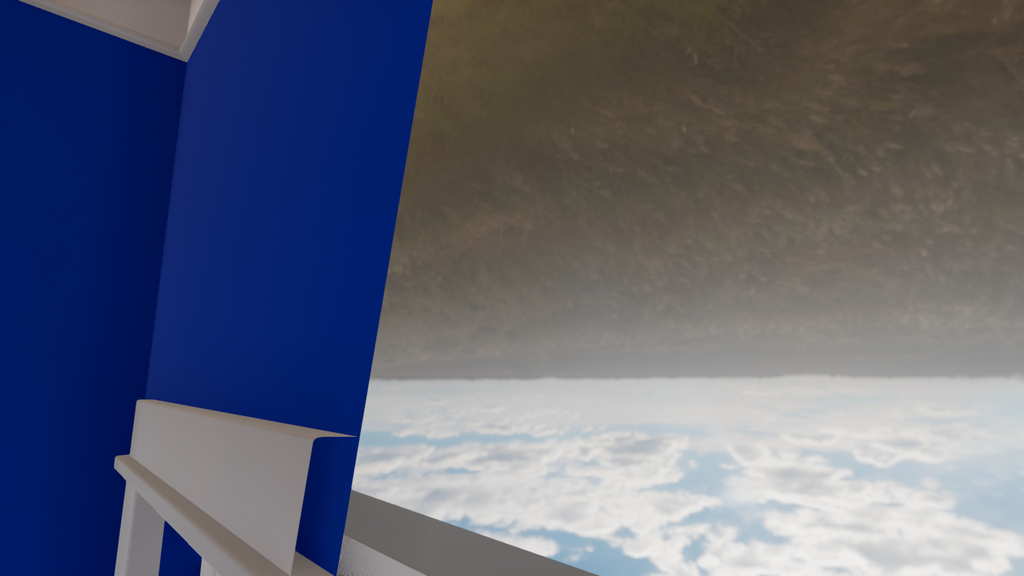

In [17]:
import os
import numpy as np

from ipywidgets import interact
from PIL import Image
from datasetinsights.stats.visualization.plots import plot_bboxes3d
from datasetinsights.datasets.synthetic import read_bounding_box_3d

bounding_box_3d_defintion_id = "0bfbe00d-00fa-4555-88d1-471b58449f5c"
def draw_bounding_boxes3d(index):
    filename = os.path.join(data_root, box_captures.loc[index, "filename"])
    annotations = box_captures.loc[index, "annotation.values"]
    sensor = box_captures.loc[index, "sensor"]

    if 'camera_intrinsic' in sensor:
        projection = np.array(sensor["camera_intrinsic"])
    else:
        projection = np.array([[1,0,0],[0,1,0],[0,0,1]])

    image = Image.open(filename)
    boxes = read_bounding_box_3d(annotations)
    img_with_boxes = plot_bboxes3d(image, boxes, projection)
    img_with_boxes.thumbnail([1024,1024], Image.ANTIALIAS)
    display(img_with_boxes)

try:
    box_captures = cap.filter(def_id=bounding_box_3d_defintion_id)
    interact(draw_bounding_boxes3d, index=(0, box_captures.shape[0]))
except DefinitionIDError:
    print("No bounding boxes found")

## Semantic Segmentation
In this section we render the semantic segmentation images on top of the captured images.

In [18]:
def draw_with_segmentation(index, opacity):
    filename = os.path.join(data_root, seg_captures.loc[index, "filename"])
    seg_filename = os.path.join(data_root, seg_captures.loc[index, "annotation.filename"])
    
    image = Image.open(filename)
    seg = Image.open(seg_filename)
    img_with_seg = Image.blend(image, seg, opacity)
    img_with_seg.thumbnail([1024,1024], Image.ANTIALIAS)
    display(img_with_seg)
    
try:
    semantic_segmentation_definition_id = "12f94d8d-5425-4deb-9b21-5e53ad957d66"
    seg_captures = cap.filter(def_id=semantic_segmentation_definition_id)
    interact(draw_with_segmentation, index=(148, seg_captures.shape[0]), opacity=(0.0, 1.0))
except DefinitionIDError:
    print("No semantic segmentation images found")

ValueError: value must be between min and max (min=148, value=124, max=100)

## Instance Segmentation
In this section we render the instance segmentation images on top of the captured images. Image IDs are mapped to an RGBA color value, below the image we include a preview of the mapping between colors and IDs.

In [ ]:
def instance_sorter(instance):
    return instance["instance_id"]

def draw_with_instance_segmentation(index, opacity):
    filename = os.path.join(data_root, inst_caps.loc[index, "filename"])
    seg_filename = os.path.join(data_root, inst_caps.loc[index, "annotation.filename"])

    image = Image.open(filename)
    seg = Image.open(seg_filename)
    img_with_seg = Image.blend(image, seg, opacity)
    img_with_seg.thumbnail([1024,1024], Image.ANTIALIAS)
    display(img_with_seg)

    anns = inst_caps.loc[index, "annotation.values"].copy()
    anns.sort(key=instance_sorter)

    count = min(5, len(anns))
    print("First {} ID entries:".format(count))

    for i in range(count):
        color = anns[i].get("color")
        print ("{} => Color({:>3}, {:>3}, {:>3})".format(anns[i].get("instance_id"), color.get("r"), color.get("g"), color.get("b")))

try:
    inst_seg_def_id = "1ccebeb4-5886-41ff-8fe0-f911fa8cbcdf"
    inst_caps = cap.filter(def_id=inst_seg_def_id)
    interact(draw_with_instance_segmentation, index=(0, inst_caps.shape[0]), opacity=(0.0, 1.0))
except DefinitionIDError:
    print("No instance segmentation images found")

## Keypoints
In this section we render the keypoint labeled data for the captured frame.

In [ ]:
from datasetinsights.stats.visualization.plots import plot_keypoints


def draw_human_pose(index):
    filename = os.path.join(data_root, keypoint_caps.loc[index, "filename"])
    annotations = keypoint_caps.loc[index, "annotation.values"]
    templates = ann_def.get_definition(keypoint_def_id)['spec']
    img = Image.open(filename)
    img_with_pose = plot_keypoints(img, annotations, templates)
    img_with_pose.thumbnail([1024,1024], Image.ANTIALIAS)
    display(img_with_pose)


try:
    keypoint_def_id = "8b3ef246-daa7-4dd5-a0e8-a943f6e7f8c2"
    keypoint_caps = cap.filter(def_id=keypoint_def_id)
    interact(draw_human_pose, index=(0, keypoint_caps.shape[0] - 1))
except DefinitionIDError:
    print("No keypoint data found")


In [ ]:
cap = Captures(data_root)
inst_seg_def_id = "1ccebeb4-5886-41ff-8fe0-f911fa8cbcdf"
captures = cap.filter(def_id=inst_seg_def_id)
captures.loc[147, "filename"]